In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import openturns as ot
import openturns.viewer as viewer

In [6]:
df = pd.read_csv('test.csv', header=None)

In [50]:
x = df[0].to_list()
y = df[1].to_list()
print(x)
print(y)
# uses frechet extreme value distribution
# https://academic.oup.com/bioinformatics/article/34/19/3258/4990825
# try scipy.stats.genextreme
# https://www.geeksforgeeks.org/scipy-stats-genextreme-python/
# https://stackoverflow.com/questions/43411581/fitting-data-to-a-generalized-extreme-value-distribution

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[0.0, 0.2857142857142857, 0.6666666666666666, 1.3333333333333333, 1.6666666666666667, 1.5555555555555556, 1.0, 0.7777777777777778, 0.7777777777777778, 1.0, 0.6666666666666666, 0.4444444444444444, 0.25, 0.5]


In [8]:
# http://amid.fish/humble-gumbel
# need to convert my data to probabilities
def gumbel_pdf(prob, loc, scale):
    z = (prob - loc) / scale
    return exp(-z - exp(-z)) / scale

In [9]:
# this might work
# https://openturns.github.io/openturns/latest/auto_data_analysis/distribution_fitting/plot_fit_extreme_value_distribution.html

In [13]:
ot.Log.Show(ot.Log.NONE)

In [14]:
ot.RandomGenerator.SetSeed(0)

In [ ]:
myGumbel = ot.Gumbel(1.0, 3.0)
myFrechet = ot.Frechet(1.0, 1.0, 0.0)

In [ ]:
# try fitting this
# https://www.itl.nist.gov/div898/handbook/eda/section3/eda366g.htm

In [35]:
# https://machinelearningmastery.com/curve-fitting-with-python/

In [23]:
def objective(x, alpha, beta):
    e = math.e
    z = (x-alpha)/beta
    return (1/beta) * e**(z - e**z)

In [24]:
popt, _ = curve_fit(objective, x, y)

In [25]:
alpha, beta = popt

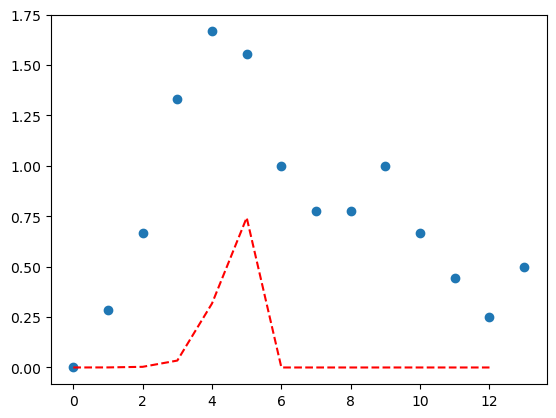

In [34]:
plt.scatter(x,y)
x_line = np.arange(min(x), max(x), 1)
y_line = objective(x_line, alpha, beta)
plt.plot(x_line, y_line, '--', color='red')
plt.show()

In [ ]:
# http://amid.fish/humble-gumbel

In [52]:
print(x)
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[0.0, 0.2857142857142857, 0.6666666666666666, 1.3333333333333333, 1.6666666666666667, 1.5555555555555556, 1.0, 0.7777777777777778, 0.7777777777777778, 1.0, 0.6666666666666666, 0.4444444444444444, 0.25, 0.5]


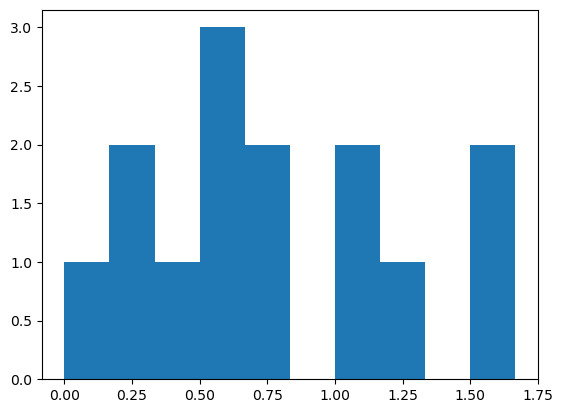

In [59]:
plt.hist(y)
plt.show()